# Digit Recognizer

## Intall required libs

In [1]:
!pip install -U scikit-learn==1.0.1 -q
!pip install pandas==1.3.4 -q
!pip install -U scikit-learn==1.0.1 -q
!pip install kaggle==1.5.12 -q
!pip install matplotlib==3.4.3 -q
!pip install seaborn==0.11.2 -q

## Download the competition files

In [2]:
!kaggle competitions download -c digit-recognizer -q

## Extract the competition files from downloaded zip file

In [3]:
import zipfile

with zipfile.ZipFile('digit-recognizer.zip', 'r') as file:
    file.extractall('./data')

## Import Libs

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [5]:
raw_data = pd.read_csv('./data/train.csv')

raw_data.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X = raw_data.drop(['label'], axis=1)
y = raw_data['label']

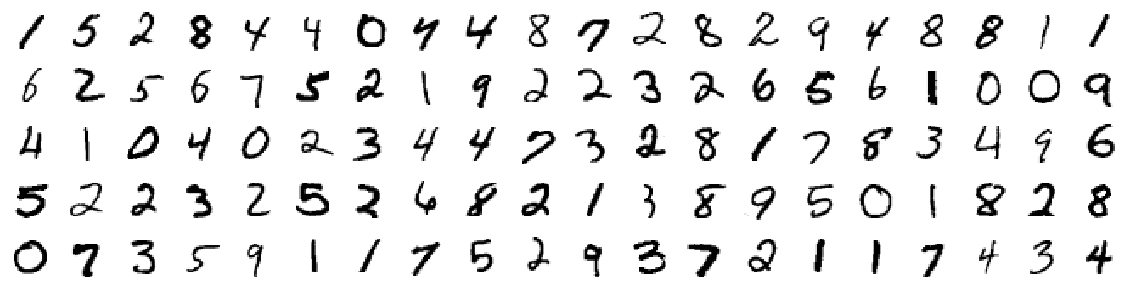

In [7]:
fig, axes = plt.subplots(5, 20, figsize = (20, 5))
axes = axes.flat


digits = X.sample(100, random_state=1).to_numpy()
for i in range(100):
    digit = digits[i]
    ax = axes[i]
    
    ax.imshow(np.reshape(digit, (28, 28)), cmap='gray_r', interpolation='nearest')
    ax.axis('off')

The data doesn't have nulls, categories or scales for us to deal with. Every dataset row contains the pixels related to a handwritten number.

This dataset is defined for data classification between the 10 available classes (numbers from 0 to 9).

As handwritten caracters they may differ depending on who wrote them so we can notice different shapes for every character and the ML models should classify every sample correctly.

## Testing some ML algorithms to create a baseline accuracy for otimizations

In [8]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, f1_score, recall_score

from sklearn.model_selection import train_test_split

In [9]:
np.random.seed(1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y)

In [10]:
%%time

svc_pred = SVC().fit(X_train.copy(), y_train.copy()).predict(X_valid.copy())
rand_forest_pred = RandomForestClassifier().fit(X_train.copy(), y_train.copy()).predict(X_valid.copy())
dec_tree_pred = DecisionTreeClassifier().fit(X_train.copy(), y_train.copy()).predict(X_valid.copy())
sgdc_pred = SGDClassifier().fit(X_train.copy(), y_train.copy()).predict(X_valid.copy())
ridge_prec = RidgeClassifier().fit(X_train.copy(), y_train.copy()).predict(X_valid.copy())
knn_pred = KNeighborsClassifier().fit(X_train.copy(), y_train.copy()).predict(X_valid.copy())
gaussion_pred = GaussianNB().fit(X_train.copy(), y_train.copy()).predict(X_valid.copy())
mlp_pred = MLPClassifier(max_iter=1000).fit(X_train.copy(), y_train.copy()).predict(X_valid.copy())

Wall time: 4min 48s


In [11]:
svc_acc = accuracy_score(y_valid, svc_pred)
svc_f1 = f1_score(y_valid, svc_pred, average='micro')
svc_recall = recall_score(y_valid, svc_pred, average='micro')

rand_forest_acc = accuracy_score(y_valid, rand_forest_pred)
rand_forest_f1 = f1_score(y_valid, rand_forest_pred, average='micro')
rand_forest_recall = recall_score(y_valid, rand_forest_pred, average='micro')

dec_tree_acc = accuracy_score(y_valid, dec_tree_pred)
dec_tree_f1 = f1_score(y_valid, dec_tree_pred, average='micro')
dec_tree_recall = recall_score(y_valid, dec_tree_pred, average='micro')

sgdc_acc = accuracy_score(y_valid, sgdc_pred)
sgdc_f1 = f1_score(y_valid, sgdc_pred, average='micro')
sgdc_recall = recall_score(y_valid, sgdc_pred, average='micro')

ridge_acc = accuracy_score(y_valid, ridge_prec)
ridge_f1 = f1_score(y_valid, ridge_prec, average='micro')
ridge_recall = recall_score(y_valid, ridge_prec, average='micro')

knn_acc = accuracy_score(y_valid, knn_pred)
knn_f1 = f1_score(y_valid, knn_pred, average='micro')
knn_recall = recall_score(y_valid, knn_pred, average='micro')

gaussion_acc = accuracy_score(y_valid, gaussion_pred)
gaussion_f1 = f1_score(y_valid, gaussion_pred, average='micro')
gaussion_recall = recall_score(y_valid, gaussion_pred, average='micro')

mlp_acc = accuracy_score(y_valid, mlp_pred)
mlp_f1 = f1_score(y_valid, mlp_pred, average='micro')
mlp_recall = recall_score(y_valid, mlp_pred, average='micro')

In [12]:
print(f'Classifier: SVC - Accuracy: {svc_acc} - f1 score: {svc_f1} - recall: {svc_recall}')
print(f'Classifier: RandomForestClassifier - Accuracy: {rand_forest_acc} - f1 score: {rand_forest_f1} - recall: {rand_forest_recall}')
print(f'Classifier: DecisionTreeClassifier - Accuracy: {dec_tree_acc} - f1 score: {dec_tree_f1} - recall: {dec_tree_recall}')
print(f'Classifier: SGDClassifier - Accuracy: {sgdc_acc} - f1 score: {sgdc_f1} - recall: {sgdc_recall}')
print(f'Classifier: RidgeClassifier - Accuracy: {ridge_acc} - f1 score: {ridge_f1} - recall: {ridge_recall}')
print(f'Classifier: KNeighborsClassifier - Accuracy: {knn_acc} - f1 score: {knn_f1} - recall: {knn_recall}')
print(f'Classifier: GaussianNB - Accuracy: {gaussion_acc} - f1 score: {gaussion_f1} - recall: {gaussion_recall}')
print(f'Classifier: MLPClassifier - Accuracy: {mlp_acc} - f1 score: {mlp_f1} - recall: {mlp_recall}')

Classifier: SVC - Accuracy: 0.9778095238095238 - f1 score: 0.9778095238095238 - recall: 0.9778095238095238
Classifier: RandomForestClassifier - Accuracy: 0.9646666666666667 - f1 score: 0.9646666666666667 - recall: 0.9646666666666667
Classifier: DecisionTreeClassifier - Accuracy: 0.856 - f1 score: 0.856 - recall: 0.856
Classifier: SGDClassifier - Accuracy: 0.8622857142857143 - f1 score: 0.8622857142857143 - recall: 0.8622857142857143
Classifier: RidgeClassifier - Accuracy: 0.8489523809523809 - f1 score: 0.8489523809523809 - recall: 0.8489523809523809
Classifier: KNeighborsClassifier - Accuracy: 0.9674285714285714 - f1 score: 0.9674285714285714 - recall: 0.9674285714285714
Classifier: GaussianNB - Accuracy: 0.5546666666666666 - f1 score: 0.5546666666666666 - recall: 0.5546666666666666
Classifier: MLPClassifier - Accuracy: 0.9553333333333334 - f1 score: 0.9553333333333334 - recall: 0.9553333333333334


Wow! I was not expecting this! Some models are performing pretty well!

Top 3 models:
* SVC - 97%
* RandomForestClassifier, KNeighborsClassifier - 96%

97% accuracy looks really good (specially because I'n not using CNNs) so now I want to check if it can get better using the Voting

In [13]:
from sklearn.ensemble import VotingClassifier

In [14]:
voting = VotingClassifier([('svc', SVC()), ('rnd-forest', RandomForestClassifier()), ('knn', KNeighborsClassifier())], n_jobs=-1)
voting.fit(X_train, y_train)

voting_pred = voting.predict(X_valid)

voting_acc = accuracy_score(y_valid, voting_pred)
voting_f1 = f1_score(y_valid, voting_pred, average='micro')
voting_recall = recall_score(y_valid, voting_pred, average='micro')

print(f'Classifier: VotingClassifier - Accuracy: {voting_acc} - f1 score: {voting_f1} - recall: {voting_recall}')

Classifier: VotingClassifier - Accuracy: 0.9764761904761905 - f1 score: 0.9764761904761905 - recall: 0.9764761904761905


Ok, no much different than SVC

## Reduce dimension 

I'm planning to reduce the dimension of the data in dataset so I can train the models faster.

Here I'm just testing stuff for learning purposes

In [15]:
from sklearn.base import BaseEstimator, TransformerMixin

In [26]:
class ImageReduceTransformer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y):
        return self
    
    def transform(self, X:np.ndarray):
        new_data = []

        for img in X:
            img = np.reshape(img, (28, 28))
            new_img = []
        
            for row in range(0, 26, 2):
                for col in range(0, 26, 2):
                    square = img[row:row+2, col:col+2]
                    new_img.append(np.mean(square))
                    
            new_data.append(new_img)
        
        return np.array(new_data)
            
    

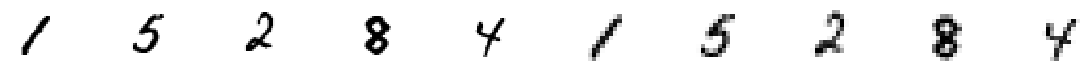

In [27]:
fig, axes = plt.subplots(1, 10, figsize = (20, 1))
axes = axes.flat


digits = X.sample(5, random_state=1).to_numpy()
for i in range(5):
    digit = digits[i]
    ax = axes[i]
    
    ax.imshow(np.reshape(digit, (28, 28)), cmap='gray_r', interpolation='nearest')
    ax.axis('off')

digits = ImageReduceTransformer().transform(digits)
for i in range(5):
    digit = digits[i]
    ax = axes[i+5]
    
    ax.imshow(np.reshape(digit, (13, 13)), cmap='gray_r', interpolation='nearest')
    ax.axis('off')
    


Cool! lets see how it performs

## Train new models using reduced dataset

In [18]:
%%time

X_train_reduced = ImageReduceTransformer().transform(X_train.to_numpy())
X_valid_reduced = ImageReduceTransformer().transform(X_valid.to_numpy())

Wall time: 1min 6s


In [19]:
%%time

svc_pred = SVC().fit(X_train_reduced, y_train).predict(X_valid_reduced)
rand_forest_pred = RandomForestClassifier().fit(X_train_reduced, y_train).predict(X_valid_reduced)
dec_tree_pred = DecisionTreeClassifier().fit(X_train_reduced, y_train).predict(X_valid_reduced)
sgdc_pred = SGDClassifier().fit(X_train_reduced, y_train).predict(X_valid_reduced)
ridge_prec = RidgeClassifier().fit(X_train_reduced, y_train).predict(X_valid_reduced)
knn_pred = KNeighborsClassifier().fit(X_train_reduced, y_train).predict(X_valid_reduced)
gaussion_pred = GaussianNB().fit(X_train_reduced, y_train).predict(X_valid_reduced)
mlp_pred = MLPClassifier(max_iter=1000).fit(X_train_reduced, y_train).predict(X_valid_reduced)

Wall time: 1min 35s


In [20]:
svc_acc = accuracy_score(y_valid, svc_pred)
svc_f1 = f1_score(y_valid, svc_pred, average='micro')
svc_recall = recall_score(y_valid, svc_pred, average='micro')

rand_forest_acc = accuracy_score(y_valid, rand_forest_pred)
rand_forest_f1 = f1_score(y_valid, rand_forest_pred, average='micro')
rand_forest_recall = recall_score(y_valid, rand_forest_pred, average='micro')

dec_tree_acc = accuracy_score(y_valid, dec_tree_pred)
dec_tree_f1 = f1_score(y_valid, dec_tree_pred, average='micro')
dec_tree_recall = recall_score(y_valid, dec_tree_pred, average='micro')

sgdc_acc = accuracy_score(y_valid, sgdc_pred)
sgdc_f1 = f1_score(y_valid, sgdc_pred, average='micro')
sgdc_recall = recall_score(y_valid, sgdc_pred, average='micro')

ridge_acc = accuracy_score(y_valid, ridge_prec)
ridge_f1 = f1_score(y_valid, ridge_prec, average='micro')
ridge_recall = recall_score(y_valid, ridge_prec, average='micro')

knn_acc = accuracy_score(y_valid, knn_pred)
knn_f1 = f1_score(y_valid, knn_pred, average='micro')
knn_recall = recall_score(y_valid, knn_pred, average='micro')

gaussion_acc = accuracy_score(y_valid, gaussion_pred)
gaussion_f1 = f1_score(y_valid, gaussion_pred, average='micro')
gaussion_recall = recall_score(y_valid, gaussion_pred, average='micro')

mlp_acc = accuracy_score(y_valid, mlp_pred)
mlp_f1 = f1_score(y_valid, mlp_pred, average='micro')
mlp_recall = recall_score(y_valid, mlp_pred, average='micro')

In [21]:
print(f'Classifier: SVC - Accuracy: {svc_acc} - f1 score: {svc_f1} - recall: {svc_recall}')
print(f'Classifier: RandomForestClassifier - Accuracy: {rand_forest_acc} - f1 score: {rand_forest_f1} - recall: {rand_forest_recall}')
print(f'Classifier: DecisionTreeClassifier - Accuracy: {dec_tree_acc} - f1 score: {dec_tree_f1} - recall: {dec_tree_recall}')
print(f'Classifier: SGDClassifier - Accuracy: {sgdc_acc} - f1 score: {sgdc_f1} - recall: {sgdc_recall}')
print(f'Classifier: RidgeClassifier - Accuracy: {ridge_acc} - f1 score: {ridge_f1} - recall: {ridge_recall}')
print(f'Classifier: KNeighborsClassifier - Accuracy: {knn_acc} - f1 score: {knn_f1} - recall: {knn_recall}')
print(f'Classifier: GaussianNB - Accuracy: {gaussion_acc} - f1 score: {gaussion_f1} - recall: {gaussion_recall}')
print(f'Classifier: MLPClassifier - Accuracy: {mlp_acc} - f1 score: {mlp_f1} - recall: {mlp_recall}')

Classifier: SVC - Accuracy: 0.9772380952380952 - f1 score: 0.9772380952380952 - recall: 0.9772380952380952
Classifier: RandomForestClassifier - Accuracy: 0.9646666666666667 - f1 score: 0.9646666666666667 - recall: 0.9646666666666667
Classifier: DecisionTreeClassifier - Accuracy: 0.8626666666666667 - f1 score: 0.8626666666666667 - recall: 0.8626666666666667
Classifier: SGDClassifier - Accuracy: 0.8786666666666667 - f1 score: 0.8786666666666667 - recall: 0.8786666666666667
Classifier: RidgeClassifier - Accuracy: 0.8576190476190476 - f1 score: 0.8576190476190476 - recall: 0.8576190476190476
Classifier: KNeighborsClassifier - Accuracy: 0.9719047619047619 - f1 score: 0.9719047619047619 - recall: 0.9719047619047619
Classifier: GaussianNB - Accuracy: 0.545047619047619 - f1 score: 0.545047619047619 - recall: 0.545047619047619
Classifier: MLPClassifier - Accuracy: 0.9654285714285714 - f1 score: 0.9654285714285714 - recall: 0.9654285714285714


The performance is close to the version with raw dataset. The final execution time (transformation + training) is 50% faster too.

## tune the 3 best models using reduced dataset

The new rank of models:
* SVC and KNeighborsClassifier - 97%
* RandomForestClassifier and MLPClassifier - 96%

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [34]:
%%time

param_grid = [
    { 'C': [1.0, 0.1, 0.01], 'kernel': ['poly', 'rbf', 'sigmoid'] }
]

grid_search = GridSearchCV(SVC(), param_grid, cv=3, scoring=make_scorer(accuracy_score, ), n_jobs=-1)
grid_search.fit(X_train_reduced, y_train.copy())

svc_pred = grid_search.predict(X_valid_reduced)
svc = grid_search.best_estimator_

svc_grid_acc = accuracy_score(y_valid, svc_pred)
svc_grid_f1 = f1_score(y_valid, svc_pred, average='micro')
svc_grid_recall = recall_score(y_valid, svc_pred, average='micro')

print(f'Classifier: SVC (Default) - Accuracy: {svc_acc} - f1 score: {svc_f1} - recall: {svc_recall}')
print(f'Classifier: SVC (Grid) - Accuracy: {svc_grid_acc} - f1 score: {svc_grid_f1} - recall: {svc_grid_recall}')
print(f'Best Parameters: {grid_search.best_params_}')

Classifier: SVC (Default) - Accuracy: 0.9772380952380952 - f1 score: 0.9772380952380952 - recall: 0.9772380952380952
Classifier: SVC (Grid) - Accuracy: 0.9772380952380952 - f1 score: 0.9772380952380952 - recall: 0.9772380952380952
Best Parameters: {'C': 1.0, 'kernel': 'rbf'}
Wall time: 15min 18s


In [35]:
%%time

param_grid = [
    { 'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']  }
]

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3, scoring=make_scorer(accuracy_score, ), n_jobs=-1)
grid_search.fit(X_train_reduced, y_train.copy())

knn_pred = grid_search.predict(X_valid_reduced)
knn = grid_search.best_estimator_

knn_grid_acc = accuracy_score(y_valid, knn_pred)
knn_grid_f1 = f1_score(y_valid, knn_pred, average='micro')
knn_grid_recall = recall_score(y_valid, knn_pred, average='micro')

print(f'Classifier: KNeighborsClassifier (Default) - Accuracy: {knn_acc} - f1 score: {knn_f1} - recall: {knn_recall}')
print(f'Classifier: KNeighborsClassifier (Grid) - Accuracy: {knn_grid_acc} - f1 score: {knn_grid_f1} - recall: {knn_grid_recall}')
print(f'Best Parameters: {grid_search.best_params_}')

Classifier: KNeighborsClassifier (Default) - Accuracy: 0.9719047619047619 - f1 score: 0.9719047619047619 - recall: 0.9719047619047619
Classifier: KNeighborsClassifier (Grid) - Accuracy: 0.9743809523809523 - f1 score: 0.9743809523809523 - recall: 0.9743809523809523
Best Parameters: {'n_neighbors': 3, 'weights': 'distance'}
Wall time: 1min 21s


In [39]:
%%time
param_grid = [
    { 
        'n_estimators': [400, 300, 200], 'criterion': ["gini", "entropy"], 'max_depth': [None, 200, 100],
        'min_samples_split': [2, 10], 'min_samples_leaf': [1, 5, 10]
    }
]

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring=make_scorer(accuracy_score, ), n_jobs=-1)
grid_search.fit(X_train_reduced, y_train)

rand_forest_pred = grid_search.predict(X_valid_reduced)
rand_forest = grid_search.best_estimator_

rand_forest_grid_acc = accuracy_score(y_valid, rand_forest_pred)
rand_forest_grid_f1 = f1_score(y_valid, rand_forest_pred, average='micro')
rand_forest_grid_recall = recall_score(y_valid, rand_forest_pred, average='micro')

print(f'Classifier: RandomForestClassifier (Default) - Accuracy: {rand_forest_acc} - f1 score: {rand_forest_f1} - recall: {rand_forest_recall}')
print(f'Classifier: RandomForestClassifier (Grid) - Accuracy: {rand_forest_grid_acc} - f1 score: {rand_forest_grid_f1} - recall: {rand_forest_grid_recall}')
print(f'Best Parameters: {grid_search.best_params_}')

Classifier: RandomForestClassifier (Default) - Accuracy: 0.9646666666666667 - f1 score: 0.9646666666666667 - recall: 0.9646666666666667
Classifier: RandomForestClassifier (Grid) - Accuracy: 0.9666666666666667 - f1 score: 0.9666666666666667 - recall: 0.9666666666666667
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Wall time: 36min 55s


In [41]:
%%time

param_grid = [
    { 
        'hidden_layer_sizes': [(100, 50, 25), (50, 25, 5), (25, 5, 1)], 
        'activation': ['identity', 'logistic', 'tanh', 'relu'], 
        'solver': ['sgd', 'adam'],
        'alpha': [0.0001, 0.01, 0.001, 0.0001]
    }
]

grid_search = GridSearchCV(MLPClassifier(max_iter=10000), param_grid, cv=3, scoring=make_scorer(accuracy_score, ), n_jobs=-1)
grid_search.fit(X_train_reduced, y_train)

mlp_pred = grid_search.predict(X_valid_reduced)
mlp = grid_search.best_estimator_

mlp_grid_acc = accuracy_score(y_valid, mlp_pred)
mlp_grid_f1 = f1_score(y_valid, mlp_pred, average='micro')
mlp_grid_recall = recall_score(y_valid, mlp_pred, average='micro')

print(f'Classifier: MLPClassifier (Default) - Accuracy: {mlp_acc} - f1 score: {mlp_f1} - recall: {mlp_recall}')
print(f'Classifier: MLPClassifier (Grid) - Accuracy: {mlp_grid_acc} - f1 score: {mlp_grid_f1} - recall: {mlp_grid_recall}')
print(f'Best Parameters: {grid_search.best_params_}')

Classifier: MLPClassifier (Default) - Accuracy: 0.9654285714285714 - f1 score: 0.9654285714285714 - recall: 0.9654285714285714
Classifier: MLPClassifier (Grid) - Accuracy: 0.9618095238095238 - f1 score: 0.9618095238095238 - recall: 0.9618095238095238
Best Parameters: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50, 25), 'solver': 'adam'}
Wall time: 3h 54min 32s


Ok, ok, we don't have any significative difference. I'll keep it simple and use KNN as my final model.

I'm planning to create 2 submission files, one for reduced images and another for raw images just to test the 2 techniques.

## Create submission files

In [47]:
X_test = pd.read_csv('./data/test.csv')
X_test_reduced = ImageReduceTransformer().transform(X_test.to_numpy())
X_reduced =  ImageReduceTransformer().transform(X.to_numpy())

In [57]:
rand_forest_pred = KNeighborsClassifier(n_neighbors=3, weights='distance').fit(X, y).predict(X_test)
rand_forest_reduced_pred = KNeighborsClassifier(n_neighbors=3, weights='distance').fit(X_reduced, y).predict(X_test_reduced)

In [58]:
# Reduced csv for submission
submission = X_test.copy()
submission['Label'] = rand_forest_reduced_pred
submission['ImageId'] = submission.index + 1
submission[['ImageId', 'Label']].to_csv('./data/submission_reduced.csv', index=False)

In [59]:
# complete csv for submission
submission = X_test.copy()
submission['Label'] = rand_forest_pred
submission['ImageId'] = submission.index + 1
submission[['ImageId', 'Label']].to_csv('./data/submission.csv', index=False)

In [60]:
!kaggle competitions submit -c digit-recognizer -f ./data/submission_reduced.csv -m "Submission using reduced images" -q

Successfully submitted to Digit Recognizer


In [61]:
!kaggle competitions submit -c digit-recognizer -f ./data/submission.csv -m "Submission using complete images" -q

Successfully submitted to Digit Recognizer


Submission using reduced images: **0.97435**<br>
Submission using complete images: **0.96921**

## Conclusion

I believe o got a good performance, specially considering I'm not using CNN. My objective here was try and test some different machine learning techniques.

I could try a technique to reduce the image resolution and compare the final performance between the "reduced" images dataset and the "complete" dataset, test it on different ML algorithms, compare performances, try to tune the models and use the final tunned KNN model to build my submission files.

Finally I could notice the performance a bit better on reduced images dataset submission (probably because I've yunned the models using this version of dataset). 